In [1]:
import numpy as np

import kcap_methods as km
import score_compression as sc
import deriv_stepsize_investigation as dsi

import matplotlib.pyplot as plt

In [11]:
step_sizes = np.array([])
for value in [0.00001, 0.0001, 0.001, 0.01]:
    for i in range(10):
        step_sizes = np.append(step_sizes, value * (i+1))
step_sizes = np.append(step_sizes, 0.1)

print(step_sizes)

[1.0000000000000001e-05 2.0000000000000002e-05 3.0000000000000004e-05
 4.0000000000000003e-05 5.0000000000000002e-05 6.0000000000000008e-05
 7.0000000000000007e-05 8.0000000000000007e-05 9.0000000000000006e-05
 1.0000000000000000e-04 1.0000000000000000e-04 2.0000000000000001e-04
 3.0000000000000003e-04 4.0000000000000002e-04 5.0000000000000001e-04
 6.0000000000000006e-04 6.9999999999999999e-04 8.0000000000000004e-04
 9.0000000000000008e-04 1.0000000000000000e-03 1.0000000000000000e-03
 2.0000000000000000e-03 3.0000000000000001e-03 4.0000000000000001e-03
 5.0000000000000001e-03 6.0000000000000001e-03 7.0000000000000001e-03
 8.0000000000000002e-03 9.0000000000000011e-03 1.0000000000000000e-02
 1.0000000000000000e-02 2.0000000000000000e-02 2.9999999999999999e-02
 4.0000000000000001e-02 5.0000000000000003e-02 5.9999999999999998e-02
 7.0000000000000007e-02 8.0000000000000002e-02 8.9999999999999997e-02
 1.0000000000000001e-01 1.0000000000000001e-01]


# Calculate the derivatives for varying stepsizes

dsi.run_varying_stepsize(step_sizes = step_sizes)

In [7]:
# # Get omega_m deriv FOMs

# omega_m_step_sizes, omega_m_fom = dsi.get_fom_vals(deriv_param = 'omega_m', step_sizes = step_sizes)

# Get omch2 deriv FOMs

omch2_step_sizes, omch2_fom = dsi.get_fom_vals(deriv_param = 'omch2', step_sizes = step_sizes)

# # Get ia deriv FOMs

# a_step_sizes, a_fom = dsi.get_fom_vals(deriv_param = 'a', step_sizes = step_sizes)

# Get sigma_8 deriv FOMs

sigma_8_step_sizes, sigma_8_fom = dsi.get_fom_vals(deriv_param = 'sigma_8', step_sizes = step_sizes)


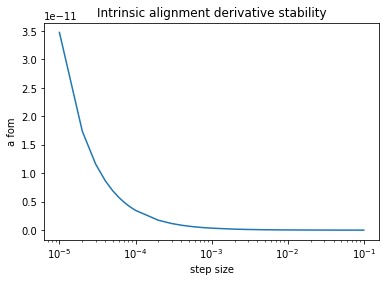

In [8]:
plt.plot(a_step_sizes, a_fom)
plt.xscale('log') 
plt.xlabel('step size')
plt.ylabel('a fom')
plt.title('Intrinsic alignment derivative stability')
plt.show()

In [9]:
print(a_fom)

[3.47504387e-11 1.73752194e-11 1.15834796e-11 8.68760968e-12
 6.95008775e-12 5.79173979e-12 4.96434839e-12 4.34380484e-12
 3.86115986e-12 3.47504387e-12 3.47504387e-12 1.73752194e-12
 1.15834796e-12 8.68760968e-13 6.95008775e-13 5.79173979e-13
 4.96434839e-13 4.34380484e-13 3.86115986e-13 3.47504387e-13
 3.47504387e-13 1.73752194e-13 1.15834796e-13 8.68760968e-14
 6.95008775e-14 5.79173979e-14 4.96434839e-14 4.34380484e-14
 3.86115986e-14 3.47504387e-14 3.47504387e-14 1.73752194e-14
 1.15834796e-14 8.68760968e-15 6.95008775e-15 5.79173979e-15
 4.96434839e-15 4.34380484e-15 3.86115986e-15 3.47504387e-15
 3.47504387e-15]


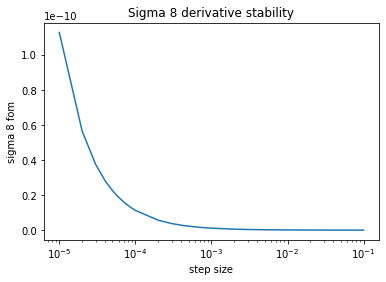

In [10]:
plt.plot(sigma_8_step_sizes, sigma_8_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('sigma 8 fom')
plt.title('Sigma 8 derivative stability')
plt.show()

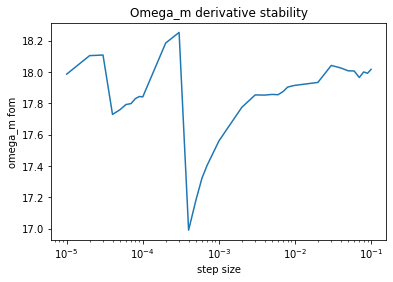

In [11]:
plt.plot(omega_m_step_sizes, omega_m_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('omega_m fom')
plt.title('Omega_m derivative stability')
plt.show()

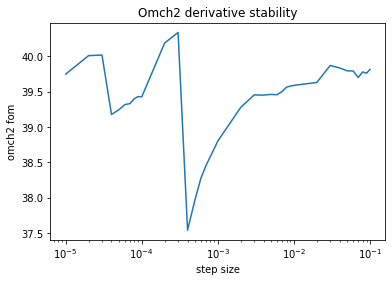

In [12]:
plt.plot(omch2_step_sizes, omch2_fom)
plt.xscale('log')
plt.xlabel('step size')
plt.ylabel('omch2 fom')
plt.title('Omch2 derivative stability')
plt.show()

Trial run 30 is the 0.01 stepsize run, so going to plot the actual derivative values that run. Should expect to see smooth IA/sigma_8, but non smooth omega_m

In [12]:
theta_dict = km.get_theta(mock_run = 30, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'])
omega_m_deriv_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_omega_m_deriv', 'shear_xi_minus_binned_omega_m_deriv'])
sigma_deriv_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_sigma_8_deriv', 'shear_xi_minus_binned_sigma_8_deriv'])
a_deriv_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_a_deriv', 'shear_xi_minus_binned_a_deriv'])

bin_ordering = ['bin_1_1', 
                'bin_2_1', 'bin_2_2', 
                'bin_3_1', 'bin_3_2', 'bin_3_3', 
                'bin_4_1', 'bin_4_2', 'bin_4_3', 'bin_4_4', 
                'bin_5_1', 'bin_5_2', 'bin_5_3', 'bin_5_4', 'bin_5_5']

The theta values seem to jump drastically in size, maybe this is part of the problem?

In [88]:
print(theta_dict['shear_xi_minus_binned'][0:9])

[  0.71336491   1.45209561   2.95582478   6.01675264  12.24744871
  24.93039168  50.74725716 103.29898312 210.27106705]


Time to plot the derivative values vs. theta for the various parameters...

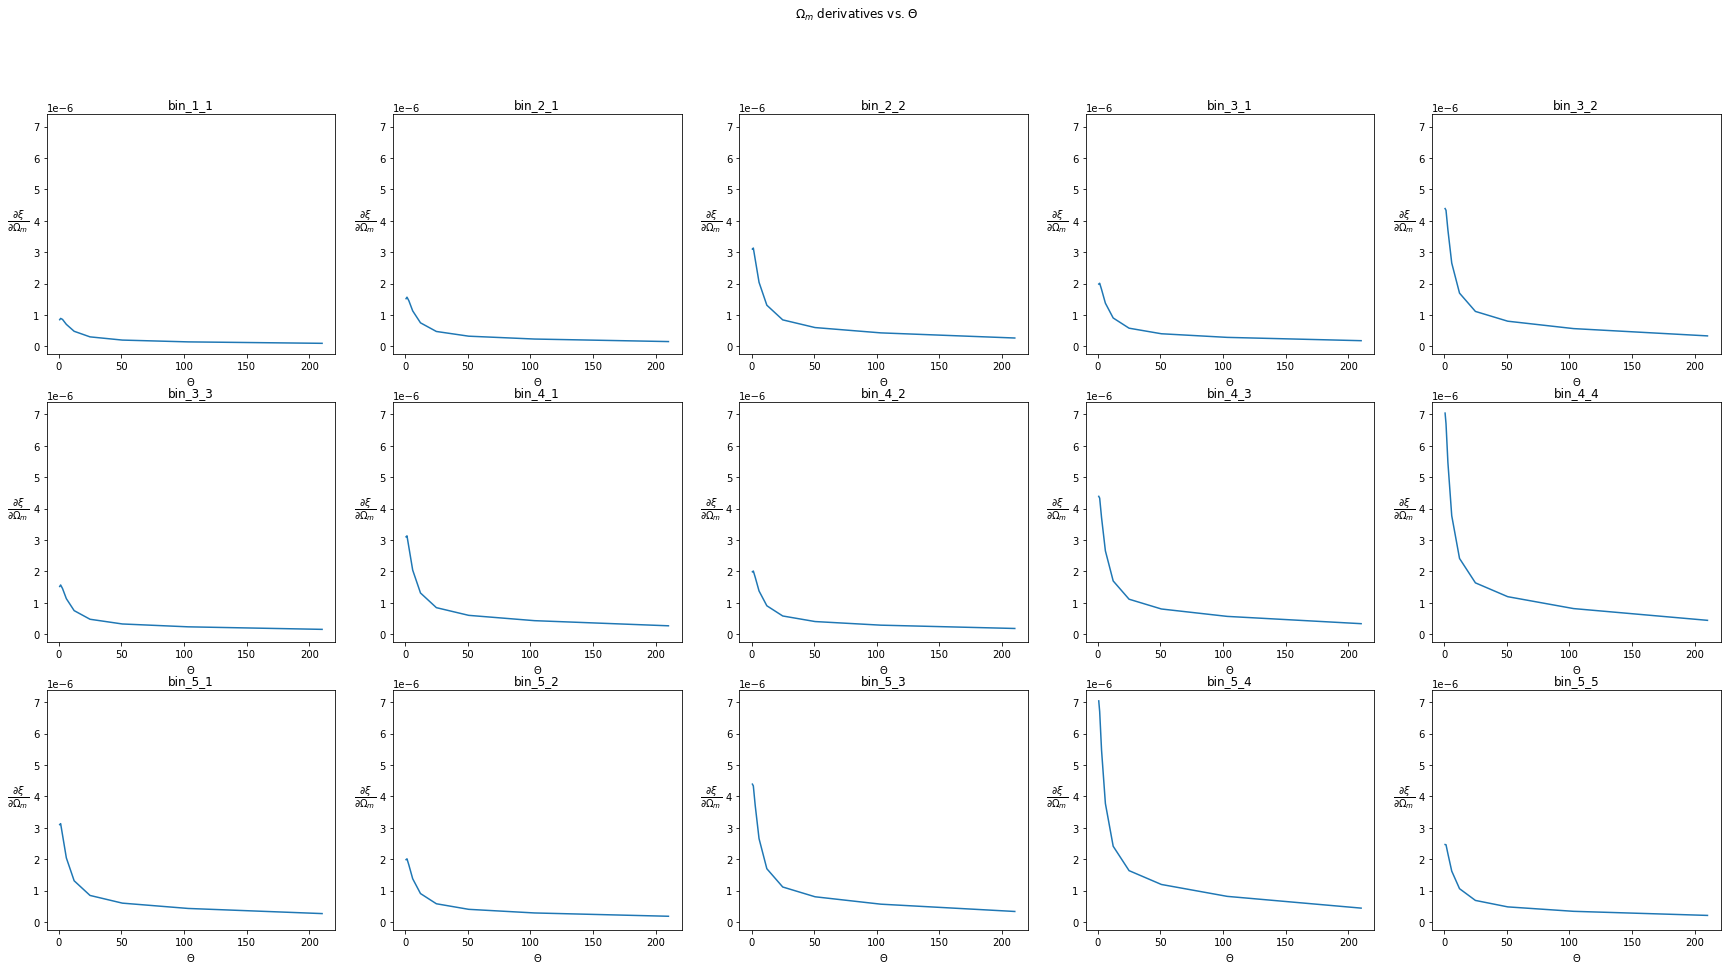

In [86]:
fig1, ax1 = plt.subplots(3, 5, sharey=True, sharex=True, figsize=(30,15))
fig1.suptitle("$\Omega_m$ derivatives vs. $\Theta$")
for i in range(3):
    ax1[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9:i*9+9])
    ax1[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+9:i*9+18])
    ax1[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+18:i*9+27])
    ax1[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+27:i*9+36])
    ax1[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], omega_m_deriv_dict['shear_xi_minus_binned_omega_m_deriv'][i*9+36:i*9+45])

for i, ax in enumerate(ax1.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\dfrac{\partial \xi}{\partial \Omega_m}$', rotation = 0, labelpad = 15)


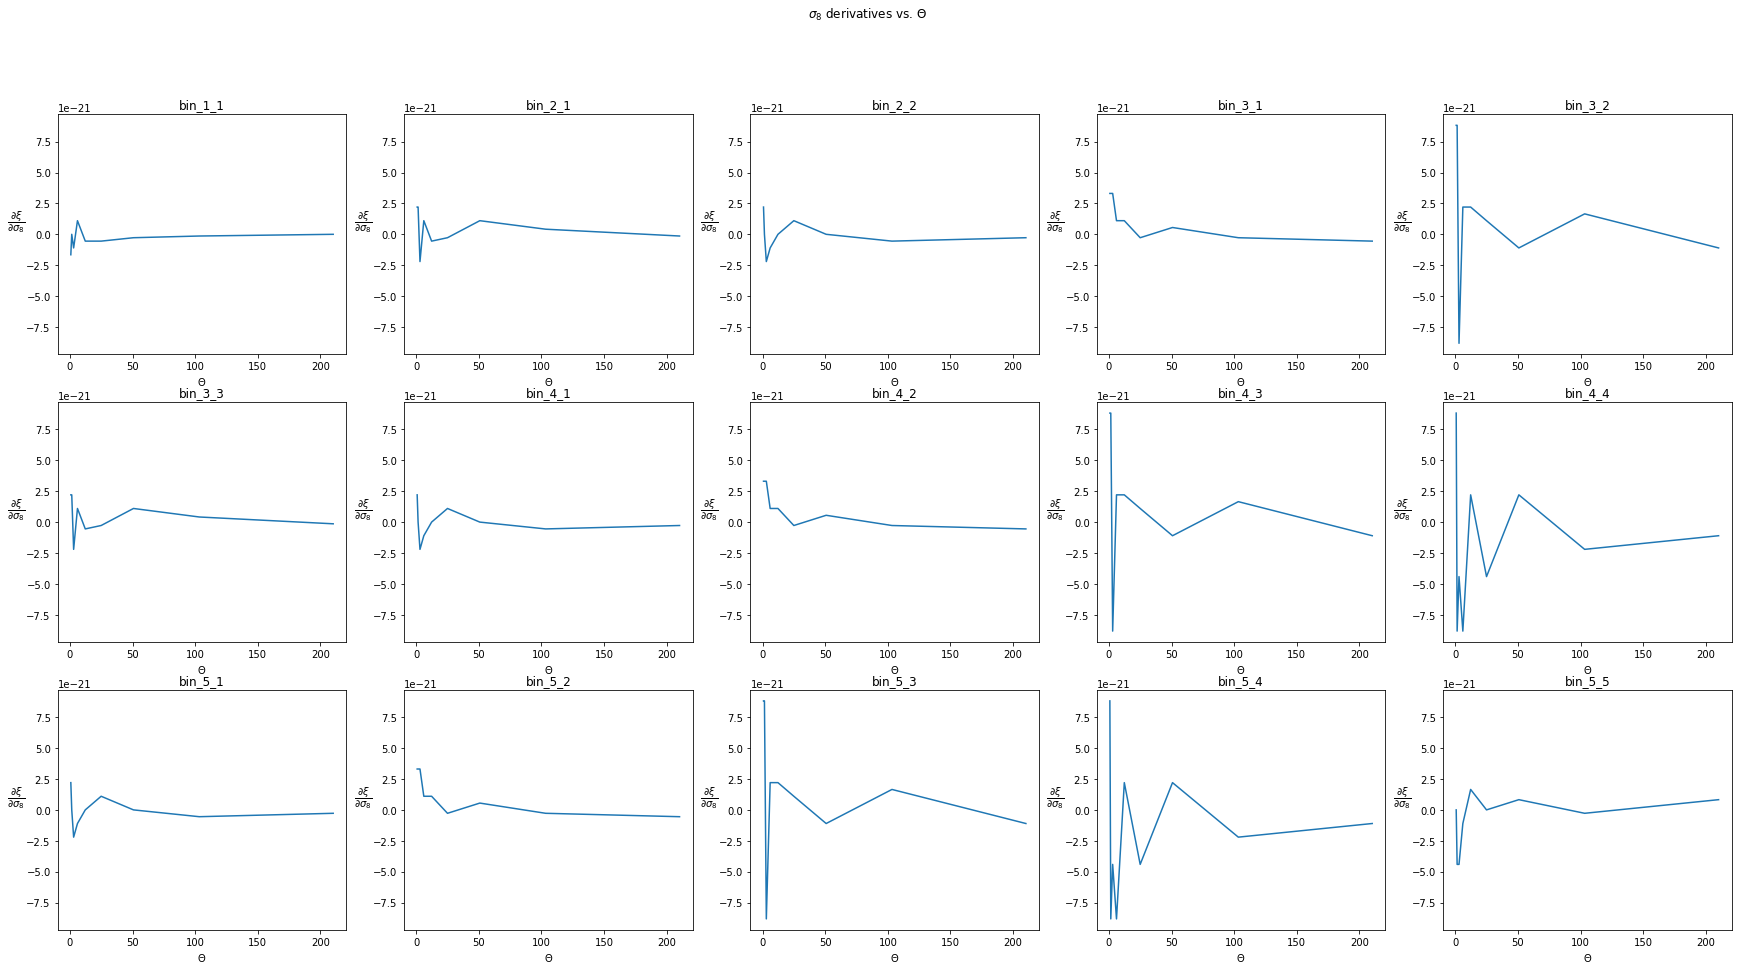

In [89]:
fig2, ax2 = plt.subplots(3, 5, sharex='all', sharey='all', figsize=(30,15))
fig2.suptitle("$\sigma_8$ derivatives vs. $\Theta$")
for i in range(3):
    ax2[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9:i*9+9])
    ax2[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+9:i*9+18])
    ax2[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+18:i*9+27])
    ax2[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+27:i*9+36])
    ax2[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], sigma_deriv_dict['shear_xi_minus_binned_sigma_8_deriv'][i*9+36:i*9+45])

for i, ax in enumerate(ax2.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\dfrac{\partial \xi}{\partial \sigma_8}$', rotation = 0, labelpad = 10)

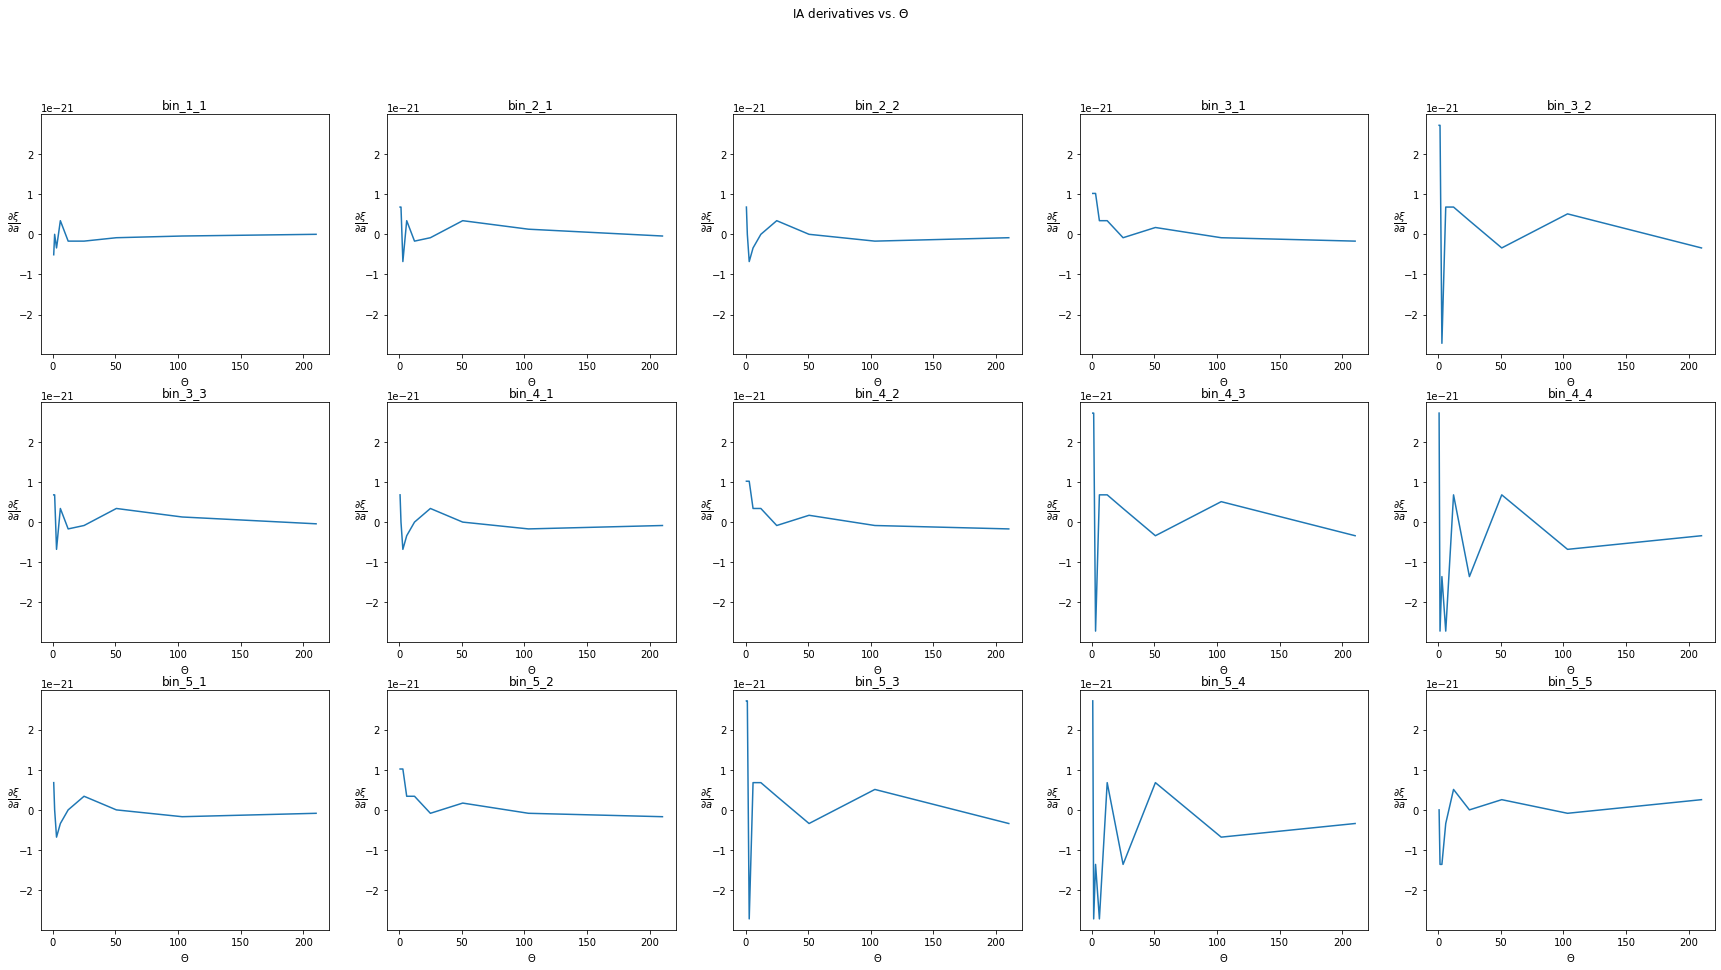

In [90]:
fig3, ax3 = plt.subplots(3, 5, sharex='all', sharey='all', figsize=(30,15))
fig3.suptitle("IA derivatives vs. $\Theta$")
for i in range(3):
    ax3[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], a_deriv_dict['shear_xi_minus_binned_a_deriv'][i*9:i*9+9])
    ax3[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], a_deriv_dict['shear_xi_minus_binned_a_deriv'][i*9+9:i*9+18])
    ax3[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], a_deriv_dict['shear_xi_minus_binned_a_deriv'][i*9+18:i*9+27])
    ax3[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], a_deriv_dict['shear_xi_minus_binned_a_deriv'][i*9+27:i*9+36])
    ax3[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], a_deriv_dict['shear_xi_minus_binned_a_deriv'][i*9+36:i*9+45])

for i, ax in enumerate(ax3.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\dfrac{\partial \xi}{\partial a}$', rotation = 0, labelpad = 5)

Going to manually do a 5 pt stencil on a particular run to see if I get the right numerical value... Checks out

stepsize = 0.001188

-2dx = 1.102062485331285860e-07
-1dx = 1.124031138053878084e-07
+1dx = 1.168742971628652289e-07
+2dx = 1.191538072909414418e-07

deriv = 1.881446976852305560e-06

# Let's try out looking at what the actual correlation function looks like

In [91]:
shear_xi_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'])

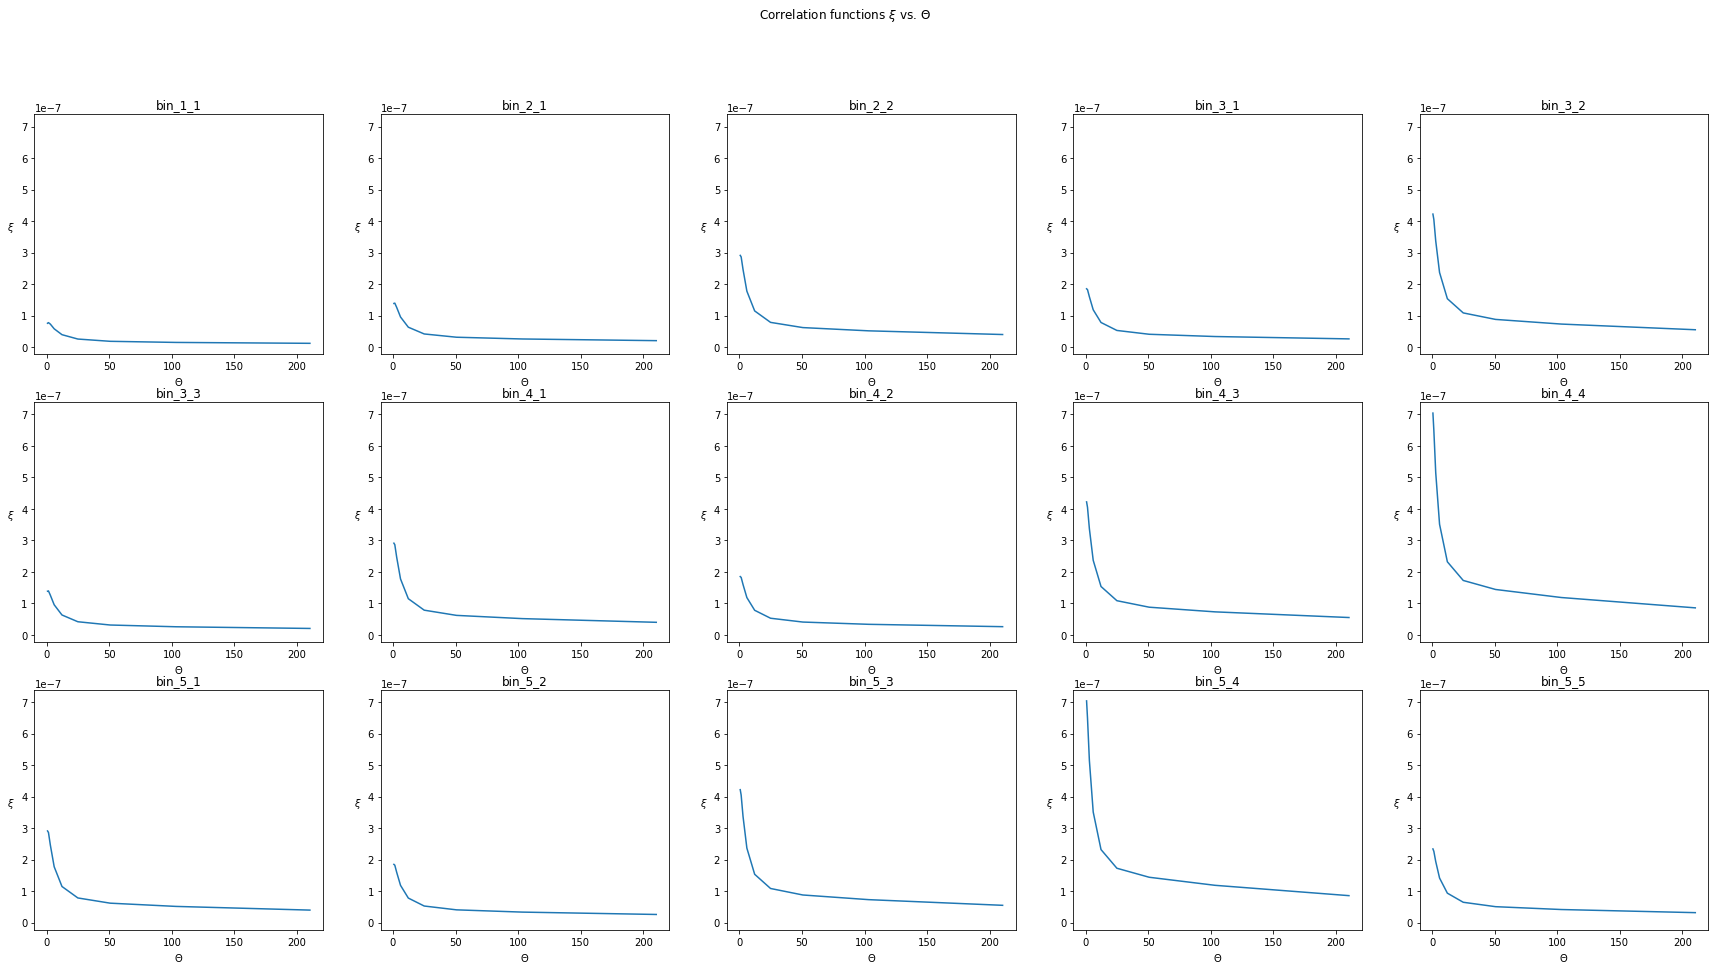

In [95]:
fig4, ax4 = plt.subplots(3, 5, sharex='all', sharey='all', figsize=(30,15))
fig4.suptitle("Correlation functions $\\xi$ vs. $\Theta$")
for i in range(3):
    ax4[i, 0].plot(theta_dict['shear_xi_minus_binned'][i*9:i*9+9], shear_xi_dict['shear_xi_minus_binned'][i*9:i*9+9])
    ax4[i, 1].plot(theta_dict['shear_xi_minus_binned'][i*9+9:i*9+18], shear_xi_dict['shear_xi_minus_binned'][i*9+9:i*9+18])
    ax4[i, 2].plot(theta_dict['shear_xi_minus_binned'][i*9+18:i*9+27], shear_xi_dict['shear_xi_minus_binned'][i*9+18:i*9+27])
    ax4[i, 3].plot(theta_dict['shear_xi_minus_binned'][i*9+27:i*9+36], shear_xi_dict['shear_xi_minus_binned'][i*9+27:i*9+36])
    ax4[i, 4].plot(theta_dict['shear_xi_minus_binned'][i*9+36:i*9+45], shear_xi_dict['shear_xi_minus_binned'][i*9+36:i*9+45])

for i, ax in enumerate(ax4.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$\xi$', rotation = 0, labelpad = 10)

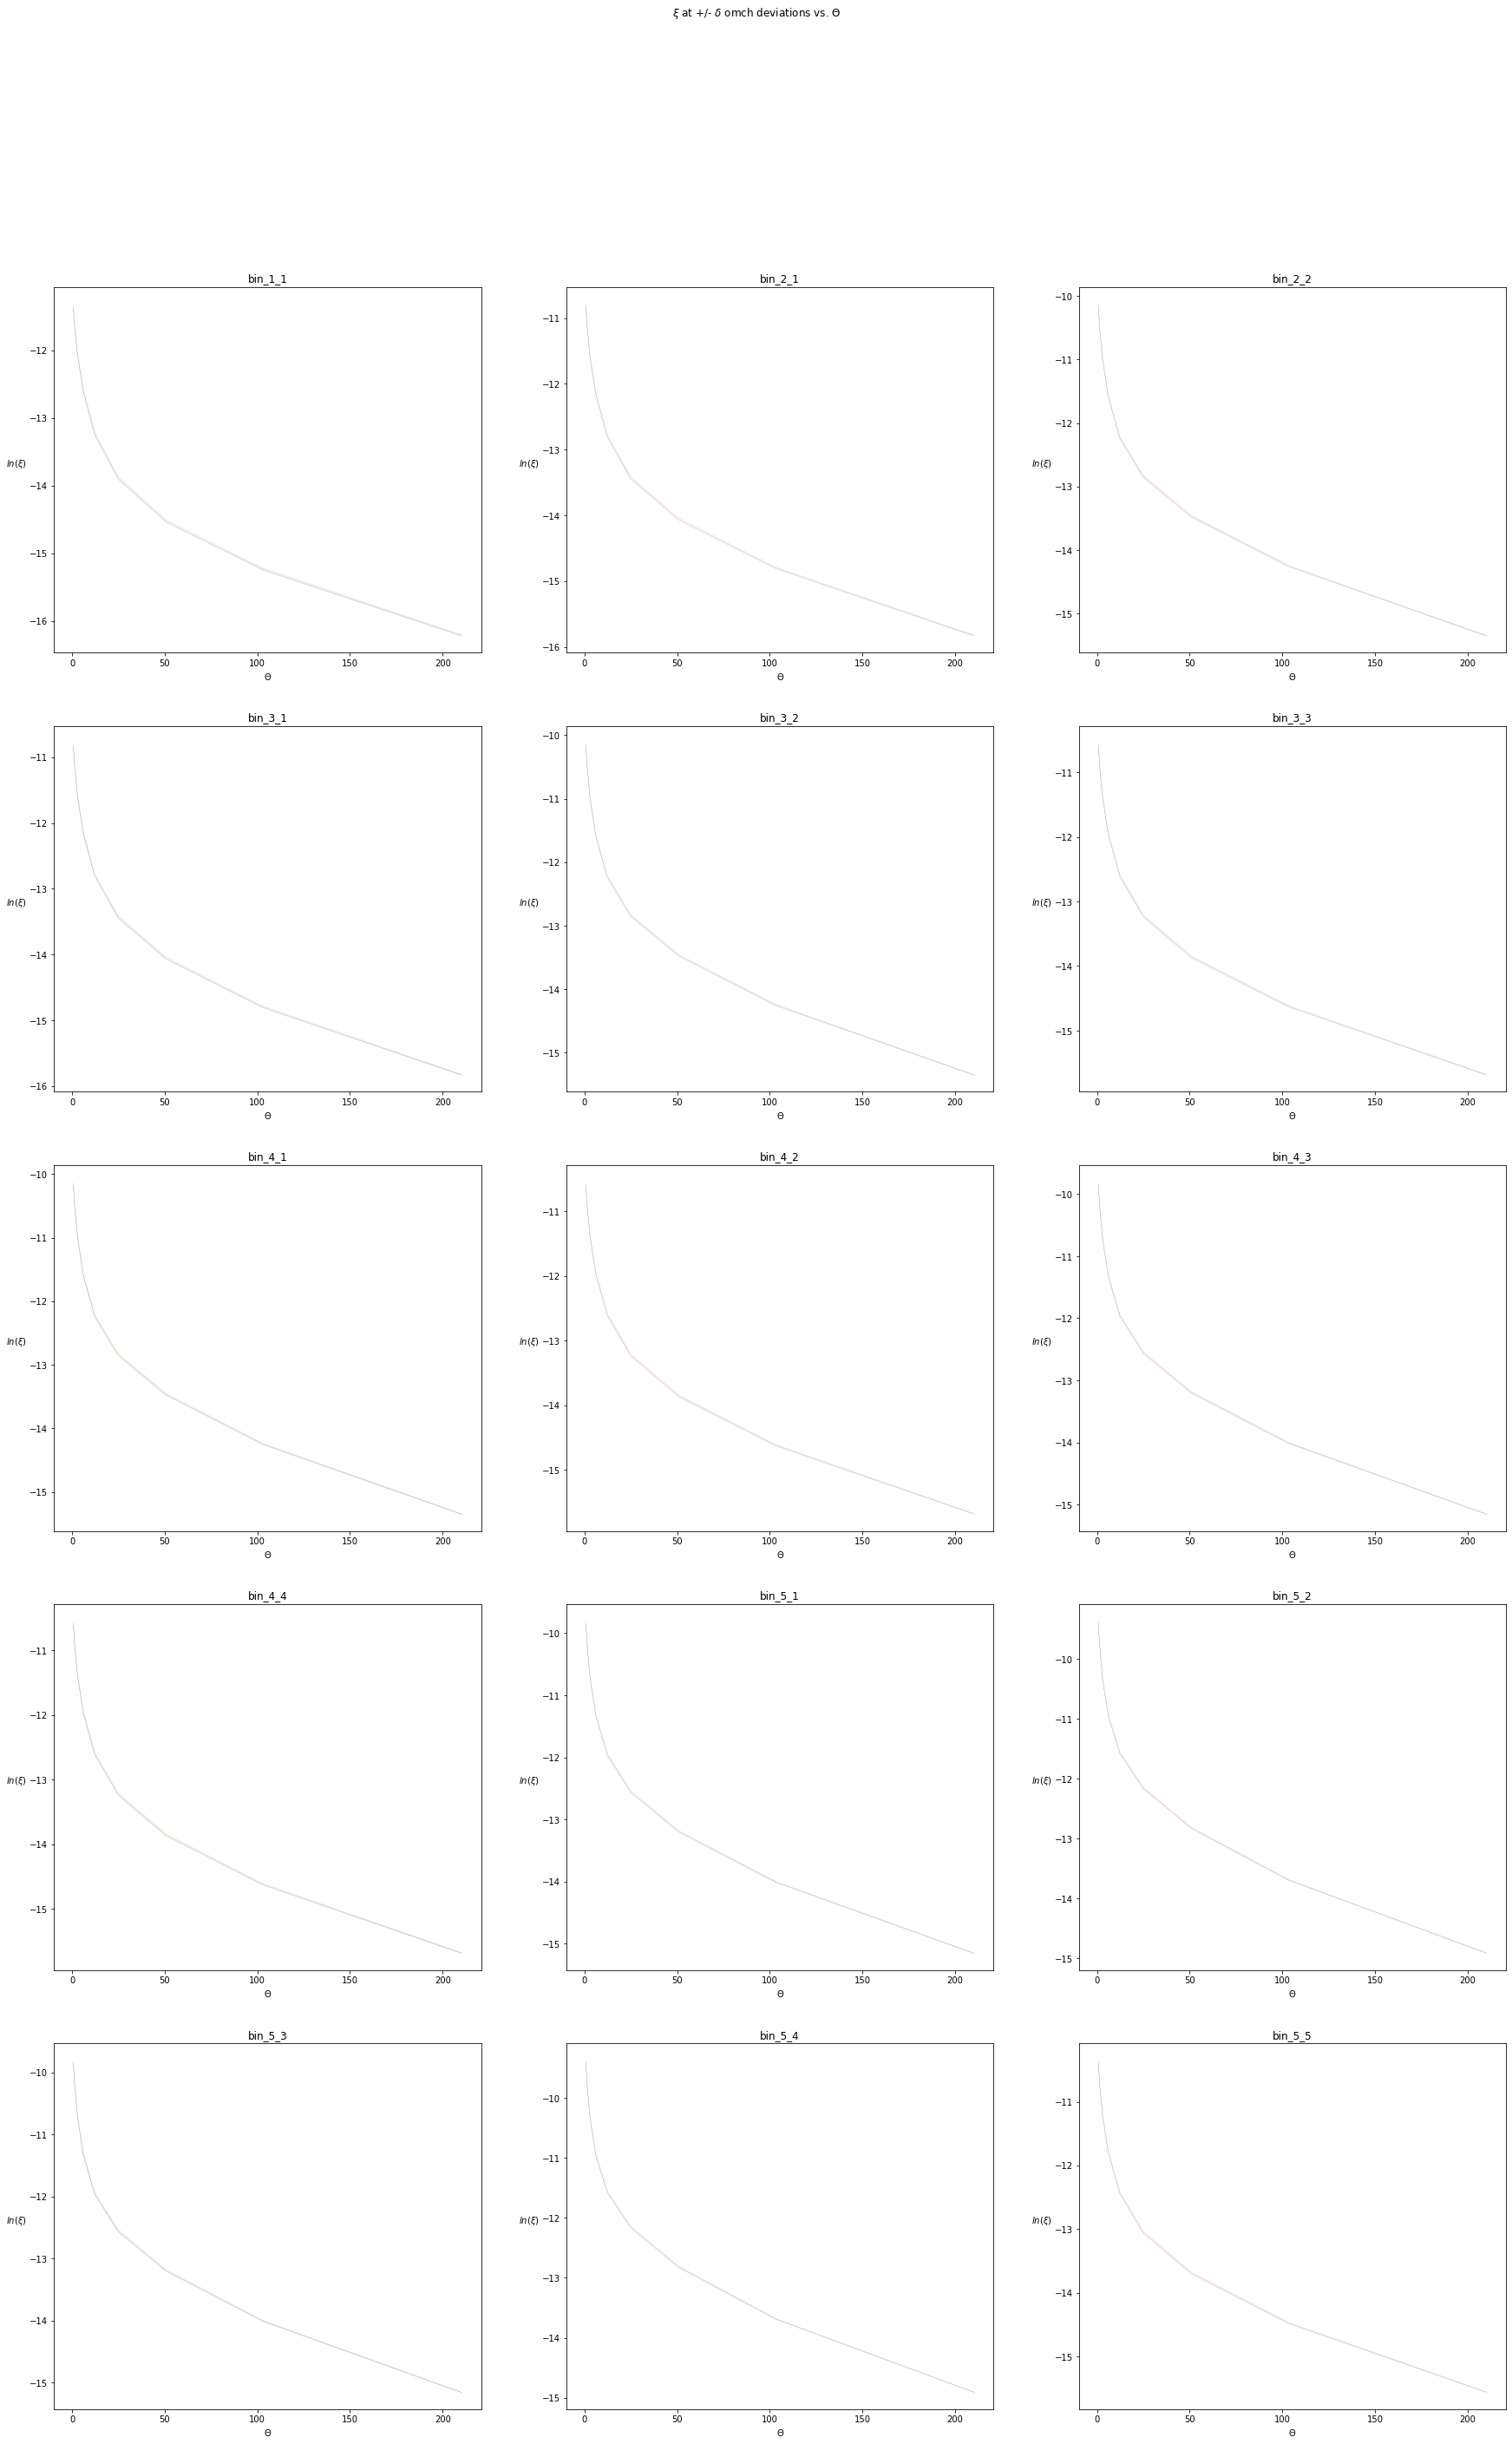

In [33]:
omega_m_dx_dict = km.get_values(mock_run = 30, vals_to_read = ['shear_xi_plus_binned_omch2-2dx', 'shear_xi_plus_binned_omch2-1dx', 'shear_xi_plus_binned', 'shear_xi_plus_binned_omch2+1dx', 'shear_xi_plus_binned_omch2+2dx'])

fig5, ax5 = plt.subplots(5, 3, sharex=True, figsize=(30,45))
fig5.suptitle(r"$\xi$ at +/- $\delta$ omch deviations vs. $\Theta$")
for i in range(5):
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9:i*9+9]), color = '#042333', linewidth=0.1)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9:i*9+9]), color = '#6b4596', linewidth=0.1)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9:i*9+9]), color = '#de7065', linewidth=0.1)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9:i*9+9]), color = '#eb8055', linewidth=0.1)
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9:i*9+9]), color = '#e8fa5b', linewidth=0.1)

    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.1)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9+9:i*9+18]), color = '#6b4596', linewidth=0.1)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9+9:i*9+18]), color = '#de7065', linewidth=0.1)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9+9:i*9+18]), color = '#eb8055', linewidth=0.1)
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9+9:i*9+18]), color = '#e8fa5b', linewidth=0.1)

    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-2dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.1)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2-1dx'][i*9+18:i*9+27]), color = '#6b4596', linewidth=0.1)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned'][i*9+18:i*9+27]), color = '#de7065', linewidth=0.1)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+1dx'][i*9+18:i*9+27]), color = '#eb8055', linewidth=0.1)
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(omega_m_dx_dict['shear_xi_plus_binned_omch2+2dx'][i*9+18:i*9+27]), color = '#e8fa5b', linewidth=0.1)

for i, ax in enumerate(ax5.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$ln(\xi)$', rotation = 0, labelpad = 15)

In [20]:
a_dx_dict = km.get_values(mock_run = 20, vals_to_read = ['shear_xi_plus_binned_a-2dx', 'shear_xi_plus_binned_a-1dx', 'shear_xi_plus_binned', 'shear_xi_plus_binned_a+1dx', 'shear_xi_plus_binned_a+2dx'])

# diff_max1 = a_dx_dict['shear_xi_plus_binned_a-2dx'][9:18] - a_dx_dict['shear_xi_plus_binned_a+2dx'][9:18]
# diff_max2 = a_dx_dict['shear_xi_plus_binned_a-2dx'][9:18] - a_dx_dict['shear_xi_plus_binned'][9:18]
# diff_max1

a = a_dx_dict['shear_xi_plus_binned_a-2dx'][9:10]
b = a_dx_dict['shear_xi_plus_binned'][9:10]

print(a)
print(b)
print(a-b)

[2.0214026042366793e-05]
[2.0181966013773624e-05]
[3.206002859316905e-08]


In [ ]:
fig5, ax5 = plt.subplots(5, 3, sharex=True, figsize=(30,45))
fig5.suptitle(r"$\xi$ at +/- $\delta$ (a) deviations vs. $\Theta$")
for i in range(5):
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(a_dx_dict['shear_xi_plus_binned_a-2dx'][i*9:i*9+9]), color = '#042333')
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(a_dx_dict['shear_xi_plus_binned_a-1dx'][i*9:i*9+9]), color = '#6b4596')
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(a_dx_dict['shear_xi_plus_binned'][i*9:i*9+9]), color = '#de7065')
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(a_dx_dict['shear_xi_plus_binned_a+1dx'][i*9:i*9+9]), color = '#eb8055')
    ax5[i, 0].plot(theta_dict['shear_xi_plus_binned'][i*9:i*9+9], np.log(a_dx_dict['shear_xi_plus_binned_a+2dx'][i*9:i*9+9]), color = '#e8fa5b')

    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(a_dx_dict['shear_xi_plus_binned_a-2dx'][i*9+9:i*9+18]), color = '#6b4596')
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(a_dx_dict['shear_xi_plus_binned_a-1dx'][i*9+9:i*9+18]), color = '#6b4596')
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(a_dx_dict['shear_xi_plus_binned'][i*9+9:i*9+18]), color = '#de7065')
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(a_dx_dict['shear_xi_plus_binned_a+1dx'][i*9+9:i*9+18]), color = '#eb8055')
    ax5[i, 1].plot(theta_dict['shear_xi_plus_binned'][i*9+9:i*9+18], np.log(a_dx_dict['shear_xi_plus_binned_a+2dx'][i*9+9:i*9+18]), color = '#e8fa5b')

    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(a_dx_dict['shear_xi_plus_binned_a-2dx'][i*9+18:i*9+27]), color = '#6b4596')
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(a_dx_dict['shear_xi_plus_binned_a-1dx'][i*9+18:i*9+27]), color = '#6b4596')
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(a_dx_dict['shear_xi_plus_binned'][i*9+18:i*9+27]), color = '#de7065')
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(a_dx_dict['shear_xi_plus_binned_a+1dx'][i*9+18:i*9+27]), color = '#eb8055')
    ax5[i, 2].plot(theta_dict['shear_xi_plus_binned'][i*9+18:i*9+27], np.log(a_dx_dict['shear_xi_plus_binned_a+2dx'][i*9+18:i*9+27]), color = '#e8fa5b')

for i, ax in enumerate(ax5.flatten()):
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_title(bin_ordering[i])
    ax.set_xlabel('$\Theta$')
    ax.set_ylabel(r'$ln(\xi)$', rotation = 0, labelpad = 15)

In [16]:
a_change = [0.974, 0.98374, 0.99348, 1.00322, 1.01296, 1.0227, 1.03244, 1.04218, 1.05192, 1.06166, 1.0714, 1.1688, 1.2662, 1.3636, 1.461, 1.5584, 1.6558, 1.7532, 1.8506, 1.948]

a_corr_vals = np.zeros(shape = (len(a_change), 270))
for i, val in enumerate(a_change):
    corr_dict = km.get_values(mock_run = i, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'])
    corr_array = np.array([])
    for vals in ['shear_xi_plus_binned', 'shear_xi_minus_binned']:
        corr_array = np.append(corr_array, corr_dict[vals])
    a_corr_vals[i] += corr_array

print(a_corr_vals[0] - a_corr_vals[0])



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [17]:
original_vals = a_corr_vals[0]

for i, vals in enumerate(a_corr_vals):
    if i == 0:
        pass
    else:
        a_corr_vals[i] -= original_vals
        new_val = np.sum(a_corr_vals[i])
        print(new_val)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [5]:
sigma_8_change = [0.811, 0.80289, 0.79478, 0.78667, 0.77856, 0.77045, 0.76234, 0.75423, 0.74612, 0.73801, 0.7299 , 0.6488 , 0.5677 , 0.4866 ,0.4055 , 0.3244 , 0.2433 , 0.1622 , 0.0811]

sigma_8_corr_vals = np.zeros(shape = (len(sigma_8_change), 270))
for i, val in enumerate(sigma_8_change):
    corr_dict = km.get_values(mock_run = i, vals_to_read = ['shear_xi_plus_binned', 'shear_xi_minus_binned'])
    corr_array = np.array([])
    for vals in ['shear_xi_plus_binned', 'shear_xi_minus_binned']:
        corr_array = np.append(corr_array, corr_dict[vals])
    sigma_8_corr_vals[i] += corr_array

sigma_8_og_vals = sigma_8_corr_vals[0]

for i, vals in enumerate(sigma_8_corr_vals):
    if i == 0:
        pass
    else:
        sigma_8_corr_vals[i] -= sigma_8_og_vals
        sigma_8_new_val = np.sum(sigma_8_corr_vals[i])
        print(sigma_8_new_val)

Need to untar files first...
Mock run extracted is: 10
Succesfully untarred
Need to untar files first...
Mock run extracted is: 11
Succesfully untarred
Need to untar files first...
Mock run extracted is: 12
Succesfully untarred
Need to untar files first...
Mock run extracted is: 13
Succesfully untarred
Need to untar files first...
Mock run extracted is: 14
Succesfully untarred
Need to untar files first...
Mock run extracted is: 15
Succesfully untarred
Need to untar files first...
Mock run extracted is: 16
Succesfully untarred
Need to untar files first...
Mock run extracted is: 17
Succesfully untarred
Need to untar files first...
Mock run extracted is: 18
Succesfully untarred
-0.00010663687103948383
-0.00021168258591609162
-0.00031515634850976936
-0.00041705267107587624
-0.00051737731372963
-0.0006161111278273216
-0.000713289085060198
-0.0008088881963419149
-0.0009029176210674316
-0.0009954118679110684
-0.0018355765461306782
-0.0025254188322741426
-0.0030717462286810613
-0.0034835432937